In [3]:
# Get semantic model from example_basic.py
from example_basic import flights_sm
from IPython.display import Image

# Auto chart detection example: bar chart

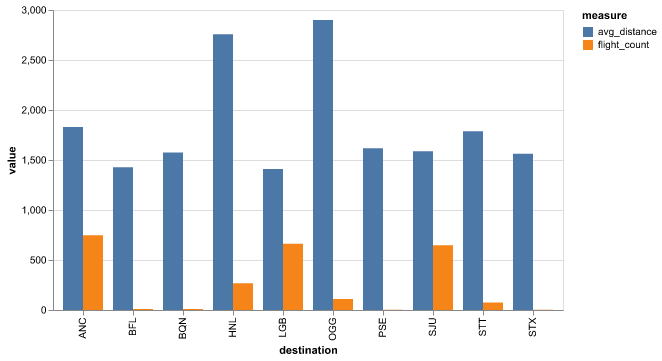

In [4]:
# note: We use Image to display image in Github.
# For regular usage, you can use .chart() and the result will be displayed in the notebook.
Image(
    flights_sm.query(
        dimensions=["destination"],
        measures=["avg_distance", "flight_count"],
        order_by=[("avg_distance", "desc")],
        limit=10,
    ).chart(format="png")
)

# Auto chart detection example: time-series

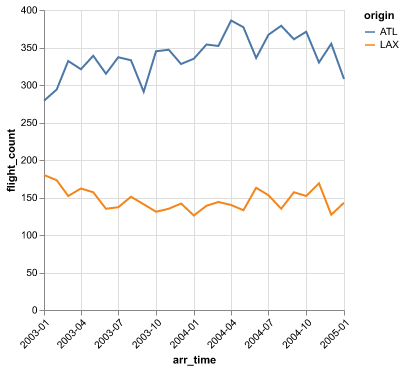

In [9]:
# note: We use Image to display image in Github.
# For regular usage, you can use .chart() and the result will be displayed in the notebook.
Image(
    flights_sm.query(
        dimensions=["arr_time", "origin"],
        measures=["flight_count"],
        time_range={"start": "2003-01-01", "end": "2005-01-31"},
        time_grain="TIME_GRAIN_MONTH",
        filters=[lambda t: t.origin.isin(["ATL", "LAX"])],
    ).chart(format="png")
)

# Auto chart detection example: heatmap

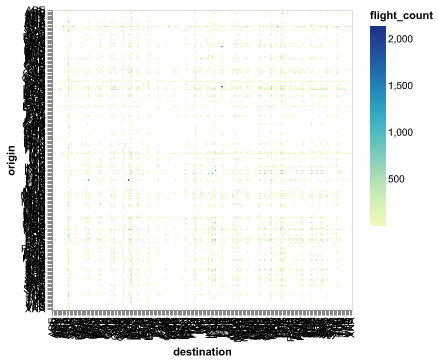

In [10]:
# note: We use Image to display image in Github.
# For regular usage, you can use .chart() and the result will be displayed in the notebook.
Image(
    flights_sm.query(
        dimensions=["destination", "origin"],
        measures=["flight_count"],
    ).chart({"height": 300, "width": 300}, format="png")
)

# Only change the mark, keep auto-detection for the rest

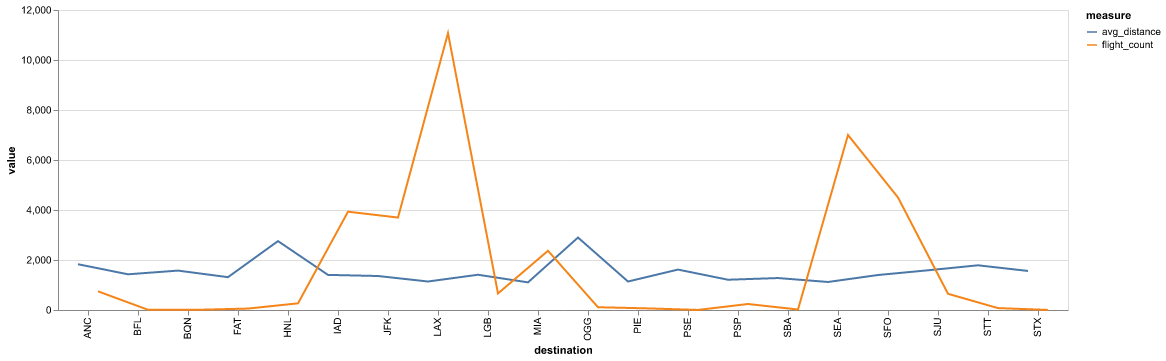

In [12]:
# note: We use Image to display image in Github.
# For regular usage, you can use .chart() and the result will be displayed in the notebook.
Image(
    flights_sm.query(
        dimensions=["destination"],
        measures=["avg_distance", "flight_count"],
        order_by=[("avg_distance", "desc")],
        limit=20,
    ).chart({"mark": "line"}, format="png")
)

# Query with chart customization

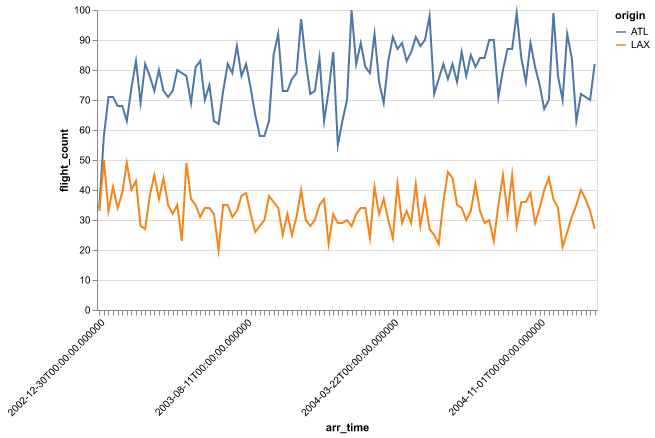

In [16]:
# note: We use Image to display image in Github.
# For regular usage, you can use .chart() and the result will be displayed in the notebook.

Image(
    flights_sm.query(
        dimensions=["arr_time", "origin"],
        measures=["flight_count"],
        time_range={"start": "2003-01-01", "end": "2005-01-31"},
        time_grain="TIME_GRAIN_WEEK",
        filters=[lambda t: t.origin.isin(["ATL", "LAX"])],
    ).chart(
        spec={
            "mark": "line",
            "encoding": {
                "x": {
                    "field": "arr_time",
                    "type": "ordinal",
                    "axis": {
                        "labelExpr": "datum.label",
                        "labelOverlap": True,
                        "tickCount": 20,
                        "labelAngle": -45,
                    },
                },
                "y": {"field": "flight_count", "type": "quantitative"},
                "color": {"field": "origin", "type": "nominal"},
            },
            "width": 500,
            "height": 300,
        },
        format="png",
    )
)

# Output format in vega-lite json

In [11]:
# This option is great for passing the chart spec to a frontend (e.g. in an MCP server context).

flights_sm.query(
    dimensions=["destination"],
    measures=["avg_distance"],
    order_by=[("avg_distance", "desc")],
    limit=20,
).chart(format="json")

{'config': {'view': {'continuousWidth': 300, 'continuousHeight': 300}},
 'data': {'name': 'data-84c210a2c9c04f389f71cd9faad56f47'},
 'mark': {'type': 'bar'},
 'encoding': {'x': {'field': 'destination', 'type': 'nominal'},
  'y': {'field': 'avg_distance', 'type': 'quantitative'},
  'tooltip': [{'field': 'destination', 'type': 'nominal'},
   {'field': 'avg_distance', 'type': 'quantitative'}]},
 '$schema': 'https://vega.github.io/schema/vega-lite/v5.20.1.json',
 'datasets': {'data-84c210a2c9c04f389f71cd9faad56f47': [{'destination': 'OGG',
    'avg_distance': 2898.90990990991},
   {'destination': 'HNL', 'avg_distance': 2756.3220973782772},
   {'destination': 'ANC', 'avg_distance': 1830.5020080321285},
   {'destination': 'STT', 'avg_distance': 1787.842105263158},
   {'destination': 'PSE', 'avg_distance': 1617.0},
   {'destination': 'SJU', 'avg_distance': 1588.3317901234568},
   {'destination': 'BQN', 'avg_distance': 1576.0},
   {'destination': 'STX', 'avg_distance': 1562.0},
   {'destinatio